# Laboratorium 8
### Page rank

In [1]:
import numpy as np
import networkx as nx

In [2]:
pip freeze | grep -E -i -w 'numpy|networkx'

networkx==2.4
numpy==1.17.4
Note: you may need to restart the kernel to use updated packages.


##### Generowanie silnie spójnych grafów skierowanych o rozmiarze n:

In [3]:
def gengraph(n=15):
    G = nx.gnp_random_graph(n, 0.5, directed=True)
    while not nx.is_strongly_connected(G):
        G = nx.gnp_random_graph(n, 0.5, directed=True)
    return G

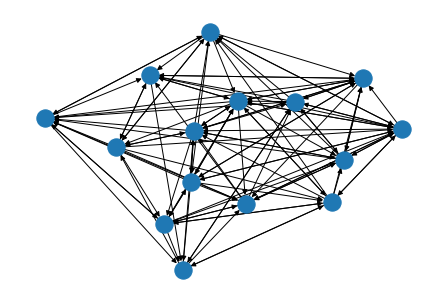

In [4]:
G = gengraph()
nx.draw(G)

### 1. Prosty ranking wierzchołków

Najpierw wykorzystam wzór podany wcześniej: $$ r(u) = d\sum\limits_{v\in B_u} \frac{r(v)}{N_v} $$
Gdzie r - ranking, d - parametr do normalizacji, $B_u$ zbiór wierzchołków, z których wychodzą krawędzie do wierzchołka u, $F_v$ zbiór wierzchołków, do których dochodzą krawędzie z wierzchołka v, a $N_v = |F_v|$,
W podejściu macierzowym: $$ r = dAr $$
Gdzie A - macierz adiacencji grafu, gdzie wagi w każdym wierszu są przeskalowane przez liczbę wychodzących krawędzi z tego wierzchołka. Zauważmy, że r można obliczyć jak dominujący wektor własny macierzy A za pomocą metody potęgowej(korzystając z poprzednio zaimplementowanej wersji).

In [5]:
def power(M, eps=1e-10, st=1e5):
    V = np.random.random_sample((M.shape[0],1))
    V = V/np.linalg.norm(V, 1)
    for i in range(int(st)):
        nex = M@V
        if np.linalg.norm(nex - V, 1) < eps:
            V = nex
            break
        V = nex
    return V/np.linalg.norm(V, 1)

In [6]:
def simpleMatrixRanking(G, eps=1e-10, its=1e4):
    M = nx.to_numpy_matrix(G) # macierz adjacencji
#     print(M)
#     print(M/np.sum(M, axis=1))
    M=M/np.sum(M, axis=0) # przeskalowanie macierzy adjacencji
    return power(M, eps, its)

1.0 [[0.07041893]
 [0.076217  ]
 [0.05700806]
 [0.06666947]
 [0.07183691]
 [0.06042513]
 [0.06857848]
 [0.05935082]
 [0.07418837]
 [0.06771925]
 [0.07587749]
 [0.05131708]
 [0.07812544]
 [0.05235893]
 [0.06990864]]


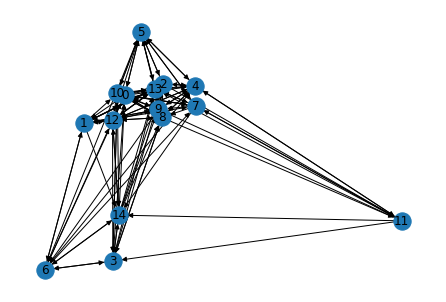

In [7]:
G = gengraph(15)
res = simpleMatrixRanking(G)
print(np.sum(res), res)
nx.draw_spectral(G, with_labels=True)

1.0000000000000002 [[0.06377646]
 [0.03362548]
 [0.0917657 ]
 [0.05783407]
 [0.06014942]
 [0.07189706]
 [0.05803976]
 [0.06165641]
 [0.08735462]
 [0.07255371]
 [0.05176231]
 [0.04808125]
 [0.0965481 ]
 [0.0509944 ]
 [0.09396125]]


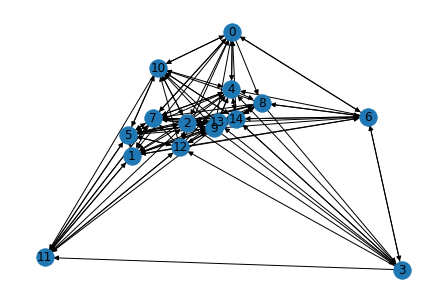

In [8]:
G = gengraph(15)
res = simpleMatrixRanking(G)
print(np.sum(res), res)
nx.draw_spectral(G, with_labels=True)

0.9999999999999999 [[0.05376396]
 [0.06666656]
 [0.06583677]
 [0.04650907]
 [0.0524707 ]
 [0.08964755]
 [0.04258879]
 [0.07256581]
 [0.07998604]
 [0.04993478]
 [0.04129133]
 [0.08148699]
 [0.09655799]
 [0.08673465]
 [0.07395901]]


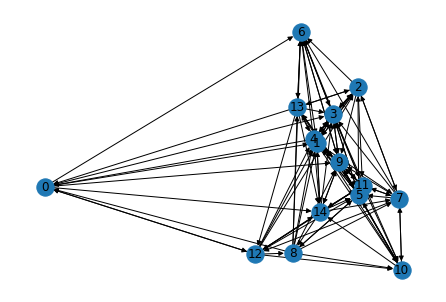

In [9]:
G = gengraph(15)
res = simpleMatrixRanking(G)
print(np.sum(res), res)
nx.draw_spectral(G, with_labels=True)

Rankingi sumują się do jedynki i wszystkie elementy mają ten sam ranking co w tym przypadku jest oczekiwane, ponieważ tak skalujemy macierz adjacencji, że liczba krawędzi nie ma wpływu na wynik.

### 2. Page Rank

Rozszerz model z poprzedniego zadania, dodjąc możliwość skoku do losowego wierzchołka grafu:
$$r(u) = d \sum\limits_{v\in B_u}\frac{r(v)}{N_v}+(1-d)e(u)$$
W zapisie macierzowym: $$r=(dA+(1-d)e*1)r$$
Ponownie można skorzystać z metody potęgowej

In [10]:
def pageRank(G, d, e, eps=1e-10, its=1e4):
    M = nx.to_numpy_matrix(G) # macierz adjacencji
    suma = np.sum(M, axis=1)
    suma[suma==0] = 1 # nie mamy gwarancji silnej spojnosci, wiec niektore wiersze moga sie zerowac
    M=M/suma # przeskalowanie macierzy adjacencji
    B = d*M+(1-d)*(np.identity(M.shape[0])*e)
    
    r = np.random.random_sample((B.shape[0],1))
    r = r/np.linalg.norm(r, 1)
    e = e.reshape((B.shape[0],1)) # zeby sie zgadzalo przy dodawaniu
    cnt=0
    while cnt<int(its):
        nex = B@r
        d = np.linalg.norm(r, 1) - np.linalg.norm(nex, 1)
        nex = nex+d*e
        if np.linalg.norm(nex - r, 1) < eps:
            r = nex
            break
        r = nex
        cnt+=1
    return r

In [11]:
N = 15
ds = [0.9, 0.85, 0.75, 0.6, 0.5]
e = 1/N * np.ones(N)
G = gengraph(N)

In [12]:
for d in ds:
    G = gengraph(N)
    res = pageRank(G, d, e)
    print(np.sum(res), res.reshape(1, -1))

1.0000000000000002 [[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667]]
0.9999999999999997 [[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667]]
1.0 [[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667]]
0.9999999999999997 [[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667]]
1.0 [[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667]]


Skoro wszystkie wierzchołki otrzymają takie same dane wejściowe, niewrażliwe na liczbę krawędzi, to wszystkie wierzchołki ostatecznie dostaną taką samą rangę.

In [13]:
e = np.random.random_sample((N,1))
e = e/np.linalg.norm(e, 1)

In [14]:
for d in ds:
    G = gengraph(N)
    res = pageRank(G, d, e)
    print(np.sum(res), res.reshape(1, -1))

1.0000000000000004 [[0.07074729 0.05957621 0.06893743 0.06613998 0.06917537 0.07080016
  0.05959668 0.07033294 0.06709049 0.068992   0.06648541 0.06170643
  0.06216675 0.06643979 0.07181307]]
0.9999999999999999 [[0.07000443 0.05534104 0.06982631 0.06811325 0.07043902 0.07043063
  0.06025559 0.06960373 0.07221177 0.06726193 0.06801361 0.06131953
  0.05829788 0.06442445 0.07445682]]
1.0 [[0.07507536 0.05200727 0.07156778 0.06671863 0.06613405 0.07347304
  0.05386471 0.07691812 0.07152175 0.07079041 0.07003128 0.055111
  0.05420769 0.06377596 0.07880295]]
0.9999999999999998 [[0.07739874 0.04313059 0.07623226 0.06051833 0.06848872 0.07933155
  0.05214256 0.07770395 0.07679321 0.06590964 0.07719628 0.04959451
  0.04813958 0.06172851 0.08569158]]
1.0000000000000009 [[0.07761485 0.03895824 0.07819127 0.06533493 0.07439804 0.08163056
  0.04564226 0.08329643 0.07536411 0.07077261 0.07300759 0.04412817
  0.04305757 0.05794817 0.0906552 ]]


W tym przypadku jak widać wyniki są bardzo podobne(mniej więcej zachowane są relacje rozmiarowo między wierzchołkami), ale już się między sobą różnią, mimo wykorzystania tego samego (losowo wcześniej ustalonego) e i różnych d oraz losowanych grafów.

In [15]:
N = 15
G = gengraph(N)
for d in ds:
    e = np.random.random_sample((N,1))
    e = e/np.linalg.norm(e, 1)
    res = pageRank(G, d, e)
    print(np.sum(res), res.reshape(1, -1))

1.0000000000000009 [[0.07045324 0.06967835 0.07184241 0.06611766 0.06252586 0.07409067
  0.06107877 0.06070064 0.06169042 0.06745234 0.06830345 0.06600975
  0.06913938 0.06563534 0.06528172]]
0.9999999999999994 [[0.06557883 0.07541002 0.06844424 0.05593026 0.06962045 0.0608192
  0.06412188 0.06932011 0.06027825 0.07316336 0.07364135 0.06093839
  0.06170816 0.07209058 0.06893492]]
1.0000000000000004 [[0.07253952 0.06104318 0.05462937 0.06710768 0.05599756 0.06583553
  0.06180937 0.08132709 0.06211961 0.05820155 0.07294616 0.05622286
  0.06953852 0.08001766 0.08066433]]
0.9999999999999996 [[0.05607699 0.03644173 0.06991929 0.08154751 0.09339628 0.06724402
  0.05849462 0.07740809 0.09982423 0.0752195  0.04144593 0.06039857
  0.05902967 0.0456207  0.07793287]]
1.0000000000000004 [[0.07585443 0.09129489 0.04435173 0.0512723  0.0812553  0.05917931
  0.07227061 0.07886174 0.06890838 0.07073175 0.04647263 0.04237892
  0.05914221 0.08007088 0.07795491]]


W tym przypadku używamy wyznaczamy page rank na tym samym grafie, jednak losowych wektorach e i różnym współczynniku d. Jak widać późniejsze wyniki (z coraz mniejszym d) znacznie od siebie odbiegają, podczas gdy dla wczesnych wyników różnice występują, jednak nie są aż tak znaczące.

Wczytanie grafu z pliku .txt pobranego ze zbioru danych snap

In [16]:
G = nx.read_edgelist("p2p-Gnutella06.txt", create_using=nx.DiGraph)

In [17]:
e = np.random.random_sample((len(G.nodes),1))
e = e/np.linalg.norm(e, 1)
for d in ds:
    res = pageRank(G, d, e)
    print(np.sum(res), res.reshape(1, -1))

0.9999999999999998 [[1.91526331e-04 1.01893575e-04 1.11110848e-04 ... 4.76746902e-05
  1.40128174e-04 2.09647606e-04]]
0.9999999999999998 [[1.90234885e-04 1.06003585e-04 1.15592739e-04 ... 4.95974843e-05
  1.35109343e-04 2.07467315e-04]]
0.9999999999999994 [[1.87431020e-04 1.14127837e-04 1.24452110e-04 ... 5.33982108e-05
  1.25117583e-04 2.03084230e-04]]
1.0 [[1.82678734e-04 1.26099977e-04 1.37507599e-04 ... 5.89989336e-05
  1.10211599e-04 1.96477315e-04]]
0.9999999999999998 [[1.79151999e-04 1.33955266e-04 1.46073743e-04 ... 6.26736476e-05
  1.00300783e-04 1.92067531e-04]]


In [18]:
G = nx.read_edgelist("p2p-Gnutella04.txt", create_using=nx.DiGraph)

In [19]:
e = np.random.random_sample((len(G.nodes),1))
e = e/np.linalg.norm(e, 1)
for d in ds:
    res = pageRank(G, d, e)
    print(np.sum(res), res.reshape(1, -1))

0.9999999999999994 [[1.45948397e-04 1.37652311e-04 8.56881783e-05 ... 7.44883638e-05
  1.27722753e-05 1.81318355e-05]]
0.9999999999999993 [[1.45112874e-04 1.36458646e-04 8.93716714e-05 ... 7.08052443e-05
  1.33212345e-05 1.89111603e-05]]
0.9999999999999992 [[1.43256922e-04 1.33838989e-04 9.66996035e-05 ... 6.35560657e-05
  1.44133109e-05 2.04615187e-05]]
0.9999999999999996 [[1.40005610e-04 1.29367606e-04 1.07587637e-04 ... 5.29768339e-05
  1.60358923e-05 2.27650102e-05]]
1.0000000000000002 [[1.37527736e-04 1.26057675e-04 1.14772453e-04 ... 4.61175362e-05
  1.71065683e-05 2.42849951e-05]]


Jak widać dla powyższych przykładów wyniki poprawne oraz są bardzo do siebie zbliżone, szczególnie jak spojrzymy na wzajemne relacje między obiektami.

Dla bardzo dużych grafów problemem jest prędkość(związana z mnożeniem macierzy), oraz co dużo istotniejsze pamięć - korzystamy z macierzy rozmiarów NxN, dla N - liczby wierzchołków i co więcej, macierze sparse dużo nie pomogą, ponieważ w wyniku dodania możlwości losowych przeskoków między każdymi wierzchołkami, nie pozostanie nam dużo wolnych pól (realnie 0).

Page rank pozawala nam ocenić wierzchołki w grafie, jednak do ich oceny wymaga podania wektora e oraz skalara d. Skalar wpływa na wzajemną moc grafu i wektora e przy ustalaniu rang.